In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y = mnist['data'],mnist["target"]
X.shape,y.shape

((70000, 784), (70000,))

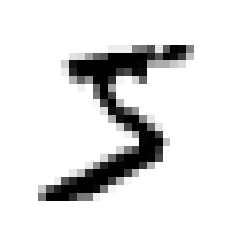

In [3]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis("off")
plt.show()

In [4]:
y=y.astype(np.uint8)
x_train ,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)


In [5]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))
    

0.1005
0.10405
0.0993


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [8]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit (self,X,y=None):
        pass
    def predict (self,X):
        return np.zeros((len(X),1),dtype=bool)

In [9]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [10]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [12]:
# perfect prediction 
p_p = y_train_5
confusion_matrix(y_train_5,p_p)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [13]:
# precision : accuracy of perfect prediction AND RECALL
"""
precision = True positive(TP)/TP+false positive(FP)
Recall =TP/TP+FN
harmonic_meann of precisions and recall
f1_score =2* precision*recall/precision+recall()
"""

'\nprecision = True positive(TP)/TP+false positive(FP)\nRecall =TP/TP+FN\nharmonic_meann of precisions and recall\nf1_score =2* precision*recall/precision+recall()\n'

In [14]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred),recall_score(y_train_5,y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [16]:
y_score =sgd_clf.decision_function([some_digit])

In [17]:
y_score

array([2164.22030239])

In [18]:
threshold=0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [19]:
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [21]:
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
precision[:-1]

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [22]:
def plot_precision_recall_vs_threshold(precision,recall,thresholds):
    plt.plot(thresholds,precision[:-1],"b--",label = "precision")
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    [...]
    plt.legend()

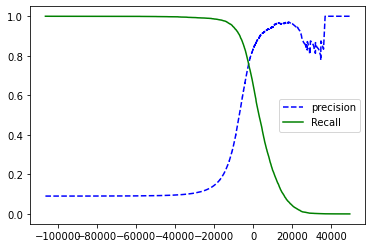

In [23]:
plot_precision_recall_vs_threshold(precision,recalls,thresholds)
plt.show()

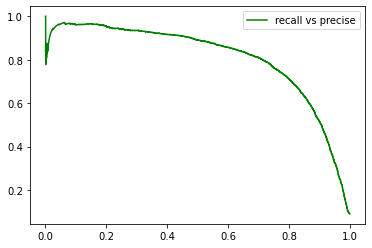

In [24]:
def plot_precision_vs_recall(precision,recall):
    plt.plot(recall[:-1],precision[:-1],'g-',label='recall vs precise')
    [...]
    plt.legend()
plot_precision_vs_recall(precision,recalls)

In [25]:
thresholds_90_precision  = thresholds[np.argmax(precision >= 0.90)]
thresholds_90_precision

3370.0194991439557

In [26]:
y_train_pred_90  = (y_scores >= thresholds_90_precision)


In [27]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [28]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

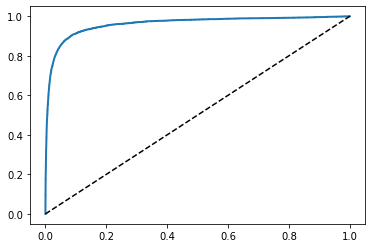

In [30]:
%matplotlib inline
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    [...]
    
plot_roc_curve(fpr,tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method="predict_proba")


In [33]:
y_score_forest = y_proba_forest[:,1]
fpr_forest,tpr_forest,threshols_forest = roc_curve(y_train_5,y_score_forest)


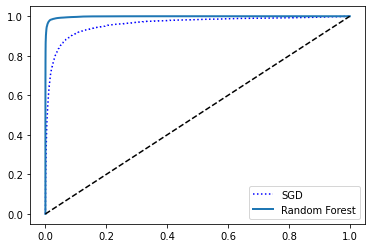

In [34]:
plt.plot(fpr,tpr,"b:",label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [35]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

In [36]:
y_predict_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3)

In [37]:
precision_score(y_train_5,y_predict_forest)

0.9905083315756169

In [38]:
recall_score(y_train_5,y_predict_forest)

0.8662608374838591

In [39]:
# multi calss classification  
from sklearn.svm import SVC
svm_clf = SVC() # ovo classifier
svm_clf.fit(x_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [40]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [41]:
np.argmax(some_digit_scores)

5

In [42]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
svm_clf.classes_[5]

5

In [ ]:
# lets force ;) classifier to work to choose ovo or ovr
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train,y_train)
ovr_clf.predict([some_digit])


In [ ]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")